In [1]:
import ipywidgets as widgets
from ipywidgets import interactive, interact                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
import os                                                 # to set current working directory 
from sklearn.decomposition import PCA                     # PCA program from scikit learn (package for machine learning)
from sklearn.preprocessing import StandardScaler          # standardize variables to mean of 0.0 and variance of 1.0
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot                         # matrix scatter plots
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # plotting
import seaborn as sns
import matplotlib.transforms as transforms

In [2]:
df=pd.read_csv("unconv_MV_v2.csv")
df

,Sample,Por,LogPerm,AI,Brittle,TOC,VR,Production,Prod2Scaled
0,1,15.91,1.67,3.06,14.05,1.36,1.85,177.381958,1897.657798
1,2,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778,2745.732996
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583,5835.130524
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629,2132.237219
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919,6282.254735
...,...,...,...,...,...,...,...,...,...
995,996,17.99,2.29,3.38,44.32,0.98,2.08,4211.527806,5230.433447
996,997,12.12,0.82,3.52,57.07,-0.04,1.73,1560.333735,2216.536779
997,998,15.55,1.50,2.48,58.25,1.89,2.35,2858.180459,3793.873108
998,999,20.89,2.02,3.23,46.17,1.71,2.27,6934.576348,7754.889551


In [3]:
df = df.iloc[:,1:9]                             # copy all rows and columns 1 through 8, note 0 column is removed
df.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.857500,14.985000,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.130000,1.390000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.577500,3.010000,3.360000,4.70000
Brittle,1000.0,49.769980,14.944955,3.030000,39.722500,49.680000,59.170000,93.47000
TOC,1000.0,1.003810,0.504978,-0.260000,0.640000,0.995000,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.810000,2.000000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.369560,1976.487820,3023.594214,12568.64413
Prod2Scaled,1000.0,3237.154325,1507.552730,2.713535,2120.961071,2991.762748,4105.623405,12568.64413


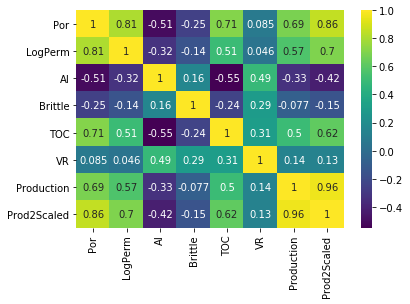

In [4]:
sns.heatmap(df.corr(),annot=True,cmap="viridis")

In [5]:
num = df._get_numeric_data()                         # get the numerical values
num[num < 0] = 0                                          # truncate negative values to 0.0
df.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.857500,14.985000,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.130000,1.390000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.577500,3.010000,3.360000,4.70000
Brittle,1000.0,49.769980,14.944955,3.030000,39.722500,49.680000,59.170000,93.47000
TOC,1000.0,1.006170,0.499838,0.000000,0.640000,0.995000,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.810000,2.000000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.369560,1976.487820,3023.594214,12568.64413
Prod2Scaled,1000.0,3237.154325,1507.552730,2.713535,2120.961071,2991.762748,4105.623405,12568.64413


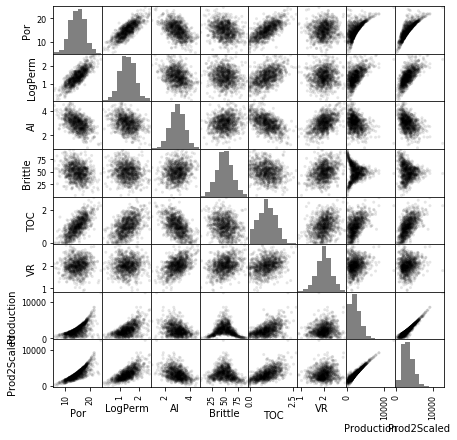

In [6]:
pd_plot.scatter_matrix(df, alpha = 0.1,              # pandas matrix scatter plot
    figsize=(7, 7),color = 'black', hist_kwds={'color':['grey']})
plt.show()

In [7]:
my_data_por_perm = df[["Por","TOC"]]                # extract just por and logperm, 100 samples
my_data_por_perm =my_data_por_perm.iloc[0:500]
my_data_por_perm.describe().transpose()                   # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,500.0,14.89936,2.985967,5.4,12.85,14.90,17.0125,23.85
TOC,500.0,0.99800,0.503635,0.0,0.64,0.96,1.3500,2.71


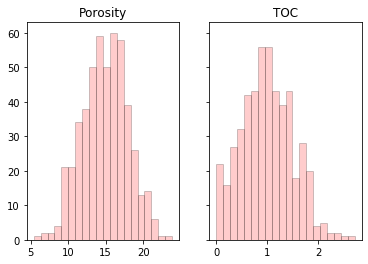

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(my_data_por_perm["Por"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
ax1.set_title('Porosity')
ax2.hist(my_data_por_perm["TOC"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
ax2.set_title('TOC')
plt.show()

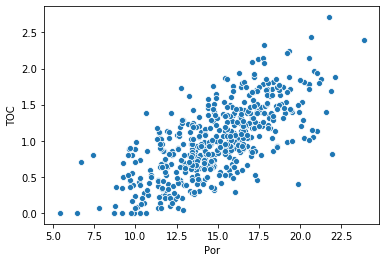

In [9]:
sns.scatterplot(x=my_data_por_perm["Por"],y=my_data_por_perm["TOC"],data=my_data_por_perm)

In [10]:


features = ['Por','TOC']
x = my_data_por_perm.loc[:,features].values
mu = np.mean(x, axis=0)
sd = np.std(x, axis=0)
x = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0

print("Original Mean Por", np.round(mu[0],2), ', Original Mean TOC = ', np.round(mu[1],2)) 
print("Original StDev Por", np.round(sd[0],2), ', Original StDev TOC = ', np.round(sd[1],2)) 
print('Mean Transformed Por =',np.round(np.mean(x[:,0]),2),', Mean Transformed TOC =',np.round(np.mean(x[:,1]),2))
print('Variance Transformed Por =',np.var(x[:,0]),', Variance Transformed TOC =',np.var(x[:,1]))

Original Mean Por 14.9 , Original Mean TOC =  1.0
Original StDev Por 2.98 , Original StDev TOC =  0.5
Mean Transformed Por = 0.0 , Mean Transformed TOC = 0.0
Variance Transformed Por = 0.9999999999999999 , Variance Transformed TOC = 1.0


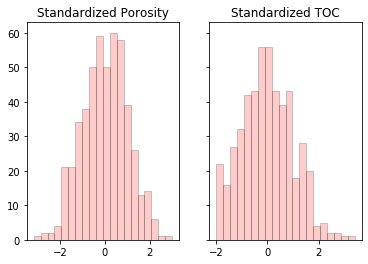

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(x[:,0], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
ax1.set_title('Standardized Porosity')
ax2.hist(x[:,1], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
ax2.set_title('Standardized TOC')
plt.show()

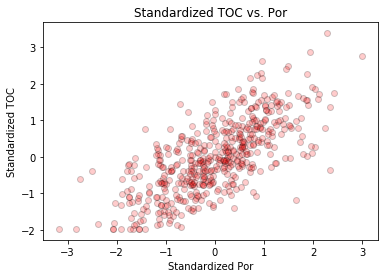

In [12]:
plt.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
plt.title('Standardized TOC vs. Por'); plt.xlabel('Standardized Por'); plt.ylabel('Standardized TOC')
plt.show()

In [13]:

n_components = 2
pca = PCA(n_components=n_components)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
print(np.round(pca.components_,3))
print('Variance explained by PC1 and PC2 =', np.round(pca.explained_variance_ratio_,3))


[[ 0.707  0.707]
 [ 0.707 -0.707]]
Variance explained by PC1 and PC2 = [0.854 0.146]


In [15]:
x[0]

array([0.33880215, 0.71949396])

In [16]:
np.concatenate(x[:,0], x[:,1])

TypeError: only integer scalar arrays can be converted to a scalar index

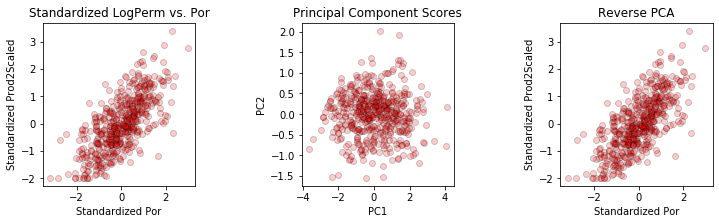

interactive(children=(IntSlider(value=0, description='Angle', max=180), Output()), _dom_classes=('widget-inter…

In [21]:

f, (ax101, ax102, ax103) = plt.subplots(1, 3,figsize=(12,3))
f.subplots_adjust(wspace=0.7)

ax101.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax101.set_title('Standardized LogPerm vs. Por'); ax101.set_xlabel('Standardized Por'); ax101.set_ylabel('Standardized Prod2Scaled')


x_trans = pca.transform(x)                                # calculate the principal component scores
ax102.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax102.set_title('Principal Component Scores'); ax102.set_xlabel('PC1'); ax102.set_ylabel('PC2')

x_reverse = pca.inverse_transform(x_trans)                        # reverse the principal component scores to standardized values
ax103.scatter(x_reverse[:,0],x_reverse[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, verts=None, edgecolors="black")
ax103.set_title('Reverse PCA'); ax103.set_xlabel('Standardized Por'); ax103.set_ylabel('Standardized Prod2Scaled')

def pc_slider(Angle=0):
    base = plt.gca().transData
    print(base)
    rot = transforms.Affine2D().rotate_deg(int(Angle))
    line = plt.plot(x[:,0],x[:,1], 'o', transform= rot + base)
    print((line[0]))
    ax = plt.gca()
    line2 = ax.lines[0]
    print(line2.get_xydata())
    
    plt.title("Chosen Angle for Data Set");plt.xlabel('Standardized Por'); plt.ylabel('Standardized TOC')
    
interact(pc_slider,Angle=(0,180),)

plt.show()